# Imporing libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

# Loading dataset

In [34]:
df=pd.read_csv("data.csv",index_col=0)
df.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


#Investigating the dataset

In [35]:
df.columns

Index(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos', 'result'],
      dtype='object')

In [36]:
viswuhan=sorted(df['vis_wuhan'].unique())
viswuhan

[0, 1]

In [37]:
fromwuhan=sorted(df['from_wuhan'].unique())
fromwuhan

[0, 1]

In [38]:
symp1_u=sorted(df['symptom1'].unique())
symp1_u

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [39]:
symp2_u=sorted(df['symptom2'].unique())
symp2_u

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [40]:
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [41]:
df['from_wuhan'].value_counts()


0    770
1     93
Name: from_wuhan, dtype: int64

In [42]:
df['vis_wuhan'].value_counts()


0    706
1    157
Name: vis_wuhan, dtype: int64

In [43]:
print(df['vis_wuhan'].mean())
print(df['from_wuhan'].mean())

0.18192352259559674
0.10776361529548088


In [44]:

#Checking values of the genders and their count
print(df['gender'].value_counts())


1    389
0    302
2    172
Name: gender, dtype: int64


In [45]:
#Checking the percentage of the unknown gender 
unknown_per=(df['gender'].value_counts()[2]/df['gender'].value_counts().sum())*100
print("Percentage of the unknown gender "+ str(unknown_per)  + " %")

Percentage of the unknown gender 19.930475086906142 %


In [46]:
#Assigning dependent and independent variables
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


Since the percentage of the unknown gender is over 19%, we can not drop records with unknown gender.

In [47]:
y

0      1
1      0
2      0
3      0
4      0
      ..
858    1
859    0
860    0
861    0
862    0
Name: result, Length: 863, dtype: int64

In [100]:
#Checking Correlation
df.corr()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
location,1.000000,0.309347,0.030077,-0.027330,0.022821,0.080120,0.033078,0.017961,0.010472,-0.026823,0.033692,0.015341,-0.119397,0.046240
country,0.309347,1.000000,0.193208,0.072339,-0.149798,-0.194170,-0.078971,-0.085210,-0.042933,-0.018526,-0.009371,-0.004384,-0.146037,-0.094443
gender,0.030077,0.193208,1.000000,-0.020662,-0.005588,-0.138997,0.146706,0.116159,0.090858,0.021882,0.026320,0.039867,-0.176528,-0.061441
age,-0.027330,0.072339,-0.020662,1.000000,-0.157173,-0.051229,-0.209028,-0.127251,-0.074863,-0.069396,0.049817,0.055145,0.074573,0.515127
vis_wuhan,0.022821,-0.149798,-0.005588,-0.157173,1.000000,-0.154200,0.087330,0.094360,0.086113,0.063738,0.025780,0.016062,0.065908,-0.151122
from_wuhan,0.080120,-0.194170,-0.138997,-0.051229,-0.154200,1.000000,0.036539,0.046923,0.068144,0.021704,0.018999,0.011837,0.019706,0.128314
symptom1,0.033078,-0.078971,0.146706,-0.209028,0.087330,0.036539,1.000000,0.519404,0.260397,0.095402,-0.002658,0.086430,-0.141160,-0.163039
symptom2,0.017961,-0.085210,0.116159,-0.127251,0.094360,0.046923,0.519404,1.000000,0.530968,0.329583,0.159823,0.072975,-0.119052,-0.103270
symptom3,0.010472,-0.042933,0.090858,-0.074863,0.086113,0.068144,0.260397,0.530968,1.000000,0.429853,0.120301,0.146347,-0.124293,-0.074982
symptom4,-0.026823,-0.018526,0.021882,-0.069396,0.063738,0.021704,0.095402,0.329583,0.429853,1.000000,0.277558,0.110553,-0.089592,-0.108723


# Using One-hot Encoding for some features in the dataset.

In [50]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_data = pd.get_dummies(X, columns = ['symptom1', 'symptom2', 'symptom3', 'symptom4',
       'symptom5', 'symptom6', 'diff_sym_hos','gender','location','country'])
one_hot_encoded_data

,age,vis_wuhan,from_wuhan,symptom1_0,symptom1_1,symptom1_2,symptom1_3,symptom1_4,symptom1_5,symptom1_6,symptom1_7,symptom1_8,symptom1_9,symptom1_10,symptom1_11,symptom1_12,symptom1_13,symptom1_14,symptom1_15,symptom1_16,symptom1_17,symptom1_18,symptom1_19,symptom1_20,symptom1_21,symptom1_22,symptom1_23,symptom1_24,symptom2_0,symptom2_1,symptom2_2,symptom2_3,symptom2_4,symptom2_5,symptom2_6,symptom2_7,symptom2_8,symptom2_9,symptom2_10,symptom2_11,...,location_133,location_134,location_135,location_136,location_137,location_138,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,country_11,country_12,country_13,country_14,country_15,country_16,country_17,country_18,country_19,country_20,country_21,country_22,country_23,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
0,66.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,56.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
859,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,49.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
861,49.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
x=one_hot_encoded_data

# Splitting the data into train and test splits

In [52]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts= train_test_split(x,y,test_size=0.2,shuffle=True,random_state=40)

# Scaling the features 

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtr = sc.fit_transform(xtr)
xts = sc.transform(xts)

# The Decision Tree model

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(xtr,ytr)


##Finding the optimal Hyperparameters using GridSearchCV

In [56]:
param_dist = {
     "criterion" : ["gini" , "entropy"],
     "max_depth" : [2 , 4 , 6 , 8, 10, 12, 14, 16],
     "min_samples_leaf": [1 , 2, 3, 4, 5, 6, 7, 8, 9, 10]
 }

In [57]:
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(clf , param_grid= param_dist , cv= 10 , n_jobs= -1)

In [58]:
GS.fit(xtr,ytr)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [59]:
GS.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=42)

In [60]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4}

In [61]:
GS.best_score_

0.9623188405797102

## The Decision Tree model with optimal hyperparameters
max depth of the tree is 8 and the criterion is entropy and minimum sample leaf 4



In [62]:
model = DecisionTreeClassifier(criterion= "entropy", max_depth= 8 , min_samples_leaf= 4 , random_state= 42)
model.fit(xtr , ytr)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=42)

In [63]:
#Predicting the values of the test set
y_pred = model.predict(xts)

##Evaluating the decision tree model
we will evaluate our decision tree model using the confusion matrix and classification report (Precision, recall, f1-score) by comparing the predicted and actual test values

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(yts, y_pred) ## confusion matrix
class_report = classification_report(yts,y_pred,zero_division=1) ## classification report
print("Confusion matrix\n\n" ,conf_matrix , "\n")
print(class_report)

Confusion matrix

 [[156   0]
 [  5  12]] 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       156
           1       1.00      0.71      0.83        17

    accuracy                           0.97       173
   macro avg       0.98      0.85      0.91       173
weighted avg       0.97      0.97      0.97       173



0.8529411764705883


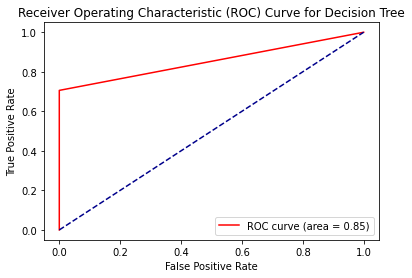

In [65]:
#Area under the curve value
roc_auc = roc_auc_score(yts,y_pred)
print(roc_auc)

#ROC Curve
fpr, tpr, thresholds = roc_curve(yts,y_pred) 

plt.plot(fpr, tpr, color='red', label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [66]:
print("Area under the ROC Curve for Decision Tree =")
print(roc_auc)

Area under the ROC Curve for Decision Tree =
0.8529411764705883


# Naive Bayes Model

In [67]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(xtr,ytr)

BernoulliNB()

In [68]:
y_pred = clf.predict(xts)

### Evaluating Naive Bayes model

In [69]:
conf_matrix = confusion_matrix(yts, y_pred) ## confusion matrix
class_report = classification_report(yts,y_pred,zero_division=1) ## classification report
print("Confusion matrix\n\n" ,conf_matrix , "\n")
print(class_report)

Confusion matrix

 [[141  15]
 [ 11   6]] 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       156
           1       0.29      0.35      0.32        17

    accuracy                           0.85       173
   macro avg       0.61      0.63      0.62       173
weighted avg       0.86      0.85      0.86       173



0.6283936651583711


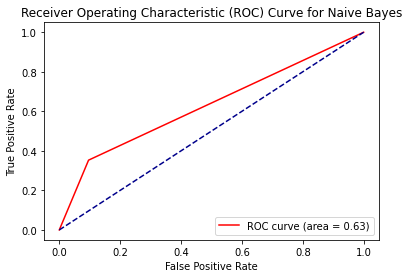

In [70]:
#Area under the curve value
roc_auc = roc_auc_score(yts,y_pred)
print(roc_auc)

#ROC Curve
fpr, tpr, thresholds = roc_curve(yts,y_pred) 

plt.plot(fpr, tpr, color='red', label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [71]:
print("Area under the ROC Curve for Naive Bayes=")
print(roc_auc)

Area under the ROC Curve for Naive Bayes=
0.6283936651583711


# Logistic Regression Classifier

In [72]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=42)
logreg.fit(xtr, ytr)

LogisticRegression(random_state=42)

In [73]:
y_pred = logreg.predict(xts)

In [74]:

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg, {
        'C': [0.01, 0.1, 1, 10, 100, 1e3,1e5],
    'penalty':['l1','l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }, 
refit = True, verbose = 1, cv=7
)
clf.fit(xtr, ytr)

Fitting 7 folds for each of 70 candidates, totalling 490 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=7, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000.0, 100000.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [75]:
df1 = pd.DataFrame(clf.cv_results_)
df1[['param_C','param_solver','mean_test_score']]

,param_C,param_solver,mean_test_score
0,0.01,newton-cg,NaN
1,0.01,lbfgs,NaN
2,0.01,liblinear,0.868113
3,0.01,sag,NaN
4,0.01,saga,0.868113
...,...,...,...
65,100000,newton-cg,0.952175
66,100000,lbfgs,0.940601
67,100000,liblinear,0.865138
68,100000,sag,0.891260


In [76]:
clf.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

## After choosing hyperparameter

In [77]:
logreg2=LogisticRegression(C=10,solver='liblinear',penalty='l1',random_state=42)
logreg2.fit(xtr, ytr)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [78]:
y_pred=logreg2.predict(xts)
cm=confusion_matrix(yts,y_pred) ## confusion matrix
cr = classification_report(yts, y_pred,zero_division=1) ## classification report
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)

Confusion matrix

 [[155   1]
 [  3  14]] 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       156
           1       0.93      0.82      0.87        17

    accuracy                           0.98       173
   macro avg       0.96      0.91      0.93       173
weighted avg       0.98      0.98      0.98       173



0.9085595776772247


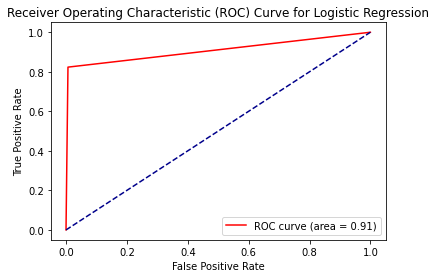

In [79]:
#Area under the curve value
roc_auc = roc_auc_score(yts,y_pred)
print(roc_auc)

#ROC Curve
fpr, tpr, thresholds = roc_curve(yts,y_pred) 

plt.plot(fpr, tpr, color='red', label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [81]:
print("Area under the ROC Curve for Logistic Regression=")
print(roc_auc)

Area under the ROC Curve for Logistic Regression=
0.9085595776772247


# Support Vector Machine

In [82]:
from sklearn.svm import SVC

model_svc = SVC(random_state=42)
model_svc.fit(xtr, ytr)

SVC(random_state=42)

## Finding the best hyperparameter

In [83]:
GS_SVC=GridSearchCV(SVC(), {
        'kernel': ['poly','rbf','sigmoid'],
         'C':[0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    }, 
   refit = True, n_jobs=-1, cv=10
   
)
GS_SVC.fit(xtr, ytr)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [84]:
df2 = pd.DataFrame(GS_SVC.cv_results_)
df2[['param_kernel','param_gamma','param_C','mean_test_score']]

,param_kernel,param_gamma,param_C,mean_test_score
0,poly,1,0.1,0.905797
1,rbf,1,0.1,0.868116
2,sigmoid,1,0.1,0.865217
3,poly,0.1,0.1,0.900000
4,rbf,0.1,0.1,0.868116
...,...,...,...,...
70,rbf,0.001,1000,0.947826
71,sigmoid,0.001,1000,0.950725
72,poly,0.0001,1000,0.868116
73,rbf,0.0001,1000,0.944928


In [85]:
GS_SVC.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}

## The SVM model with optimal hyperparameters

In [86]:
svm = SVC(C=1000,kernel='sigmoid',gamma=0.001,probability=True)
svm.fit(xtr, ytr)

y_pred=svm.predict(xts)


## Evaluating SVM Model

In [87]:
conf_matrix = confusion_matrix(yts, y_pred) ## confusion matrix
class_report = classification_report(yts,y_pred,zero_division=1) ## classification report
print("Confusion matrix\n\n" ,conf_matrix , "\n")
print(class_report)

Confusion matrix

 [[155   1]
 [  4  13]] 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       156
           1       0.93      0.76      0.84        17

    accuracy                           0.97       173
   macro avg       0.95      0.88      0.91       173
weighted avg       0.97      0.97      0.97       173



0.8791478129713424


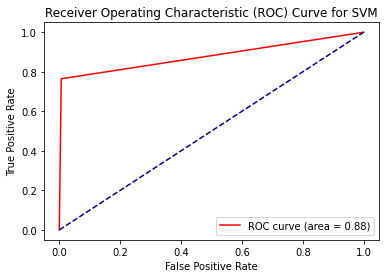

In [88]:
#Area under the curve value
roc_auc = roc_auc_score(yts,y_pred)
print(roc_auc)

#ROC Curve
fpr, tpr, thresholds = roc_curve(yts,y_pred) 

plt.plot(fpr, tpr, color='red', label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [89]:
print("Area under the ROC Curve for SVM =")
print(roc_auc)

Area under the ROC Curve for SVM =
0.8791478129713424


# K Nearest Neighbor Model
training K Nearest Neighbor with random values of k

In [90]:
from sklearn.neighbors import KNeighborsClassifier

#Getting a randm number for K from 1 to 30
init_n_val=np.random.randint(1,31)

knn_clf = KNeighborsClassifier(n_neighbors = init_n_val, metric = 'minkowski', p = 2)


In [91]:
#Defining K range
k_range=list(range(1,31,2))
#Creating parameter grid
weights = ['uniform', 'distance']
param_grid=dict(n_neighbors=k_range,weights=weights)
print(param_grid)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'weights': ['uniform', 'distance']}


In [92]:
#Instantiating GridSearch
GS_knn=GridSearchCV(knn_clf, param_grid, cv=10, scoring="accuracy")

In [93]:
#Fitting the gridseach with the training data
GS_knn.fit(xtr,ytr)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=12),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [94]:
GS_knn.best_estimator_

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [95]:
GS_knn.best_score_

0.9028985507246376

In [96]:
#Knn with best k value
knn_clf = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
knn_clf.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=7)

In [97]:
#Predicting test values
y_pred=knn_clf.predict(xts)

## Evaluating the KNN Model

In [98]:
cm = confusion_matrix(yts, y_pred) ## confusion matrix
cr = classification_report(yts,y_pred) ## classification report
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)


Confusion matrix

 [[156   0]
 [ 13   4]] 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       156
           1       1.00      0.24      0.38        17

    accuracy                           0.92       173
   macro avg       0.96      0.62      0.67       173
weighted avg       0.93      0.92      0.90       173



0.6176470588235294


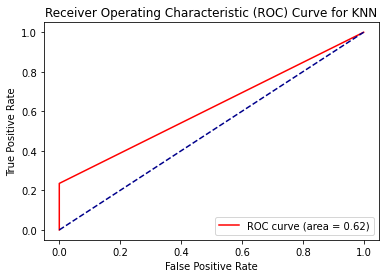

In [99]:
#Area under the curve value
roc_auc = roc_auc_score(yts,y_pred)
print(roc_auc)

#ROC Curve
fpr, tpr, thresholds = roc_curve(yts,y_pred) 

plt.plot(fpr, tpr, color='red', label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Area under the ROC Curve for Knn=")
print(roc_auc)